# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

⭐Run the following code to read in the "cardio.csv" file.

In [27]:
df = pd.read_csv("cardio.csv", sep=";")

In [28]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [30]:
df.shape

(70000, 13)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [34]:
q1, q3 = np.percentile(df.ap_hi, [25, 75])

iqr = 20
q1,q3

(120.0, 140.0)

In [35]:
low = q1 - (1.5*iqr)
upp = q3 + (1.5*iqr)
low,upp

(90.0, 170.0)

In [36]:
df.ap_hi = df.ap_hi.loc[(df.ap_hi >= low) & (df.ap_hi <upp)]
df.ap_hi.value_counts()


120.0    27699
140.0     9506
130.0     8961
110.0     8644
150.0     4450
         ...  
157.0        4
161.0        3
96.0         2
93.0         1
97.0         1
Name: ap_hi, Length: 76, dtype: int64

In [37]:
df.sort_values("ap_hi", ascending=False).head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2577,3639,19576,1,160,70.0,169.0,99,3,1,0,0,1,0
14118,20151,20278,1,169,68.0,169.0,80,1,1,0,0,0,1
423,604,21894,1,157,86.0,169.0,109,3,1,0,0,1,1
13650,19483,20296,2,167,60.0,169.0,75,1,1,0,0,1,1
7585,10828,21231,1,149,70.0,168.0,79,2,1,0,1,1,1
11328,16203,19933,1,157,61.0,168.0,100,1,1,0,0,1,1
36442,52054,19739,2,175,104.0,168.0,91,1,2,0,0,1,1
26982,38576,18723,1,152,68.0,168.0,84,3,1,0,0,1,1
68647,98068,19683,2,176,118.0,168.0,96,1,2,0,1,1,0
23606,33741,21741,1,154,90.0,168.0,90,2,1,0,0,1,1


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [38]:
ap_hi_mean = df.ap_hi.mean()
ap_hi_mean

125.71782513854498

⭐What is the standard deviation for Systolic blood pressure?

In [39]:
df.ap_hi.std()

14.801408050741477

⭐What is the standard error of the mean for Systolic blood pressure?

In [40]:
sem = df.ap_hi.sem()
sem

0.05682435390518795

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [41]:
df.ap_hi.describe()

count    67848.000000
mean       125.717825
std         14.801408
min         90.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        169.000000
Name: ap_hi, dtype: float64

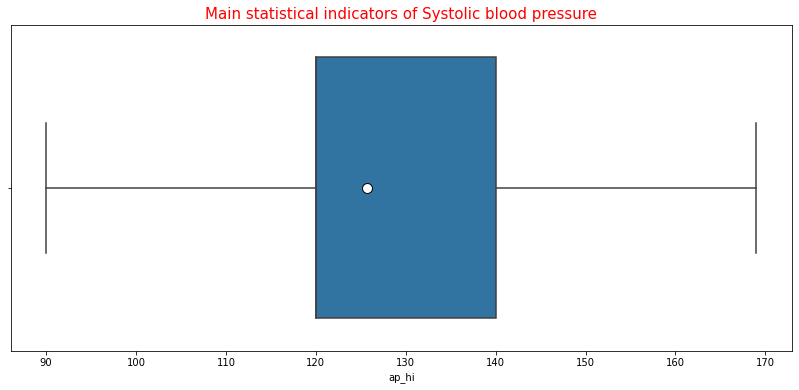

In [42]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.boxplot(x = df.ap_hi, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})

plt.title("Main statistical indicators of Systolic blood pressure", fontdict = {"fontsize":15, "color": "red"})

plt.show()

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [43]:
conf_int_90 = stats.norm.interval(confidence = 0.90, loc = ap_hi_mean, scale = sem)
conf_int_90

(125.62435739392485, 125.81129288316511)

In [44]:
conf_int_95 = stats.norm.interval(confidence = 0.95, loc = ap_hi_mean, scale = sem)
conf_int_95

(125.60645145144605, 125.82919882564391)

In [45]:
conf_int_99 = stats.norm.interval(confidence = 0.99, loc = ap_hi_mean, scale = sem)
conf_int_99

(125.57145530260077, 125.8641949744892)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [22]:
# HO: µ = 122 , Ha : µ != 122

stats.ttest_1samp(df.ap_hi, popmean = 122)  # 122 normal value, h0 budur o zaman?

TtestResult(statistic=33.373999053561214, pvalue=5.088243637709205e-240, df=31448)

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [46]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [47]:
df.groupby("gender")[["ap_hi"]].describe()

ap_hi                                                         
          count        mean        std   min    25%    50%    75%    max
gender                                                                  
1       44232.0  125.063890  15.019630  90.0  120.0  120.0  140.0  169.0
2       23616.0  126.942624  14.303882  90.0  120.0  120.0  140.0  169.0

In [62]:
df.ap_hi.isnull().sum()

2152

In [56]:
gender_1 = df.ap_hi[df.gender==1].dropna()
gender_1

1        140.0
2        130.0
4        100.0
5        120.0
6        130.0
         ...  
69993    130.0
69994    150.0
69996    140.0
69998    135.0
69999    120.0
Name: ap_hi, Length: 44232, dtype: float64

In [57]:
gender_2 = df.ap_hi[df.gender==2].dropna()
gender_2

0        110.0
3        150.0
7        130.0
11       120.0
12       120.0
         ...  
69980    110.0
69981    130.0
69984    120.0
69986    120.0
69995    120.0
Name: ap_hi, Length: 23616, dtype: float64

___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [59]:
leveneTest = stats.levene(gender_1, gender_2)
leveneTest

LeveneResult(statistic=7.3179327155363785, pvalue=0.006828694023841047)

___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [61]:
indTest = stats.ttest_ind(gender_1, gender_2, equal_var = True)
indTest

Ttest_indResult(statistic=-15.778189047619103, pvalue=5.531099606440086e-56)

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

In [65]:
df.gluc.value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [66]:
df[["gluc", "ap_hi"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gluc    70000 non-null  int64  
 1   ap_hi   67848 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


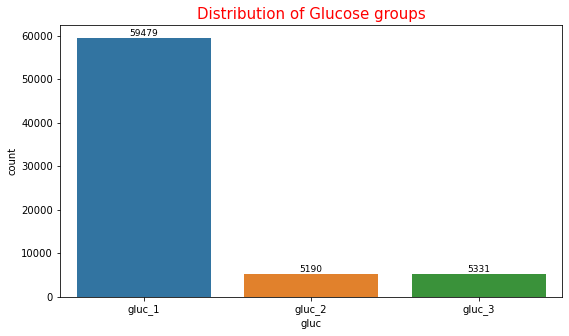

In [73]:
fig, ax = plt.subplots(figsize=(9, 5))

ax = sns.countplot(x = df.gluc)

ax.set_xticklabels(["gluc_1", "gluc_2", "gluc_3"])

ax.bar_label(ax.containers[0], size = 9);

plt.title("Distribution of Glucose groups", fontdict = {"fontsize":15, "color": "red"})

plt.show()

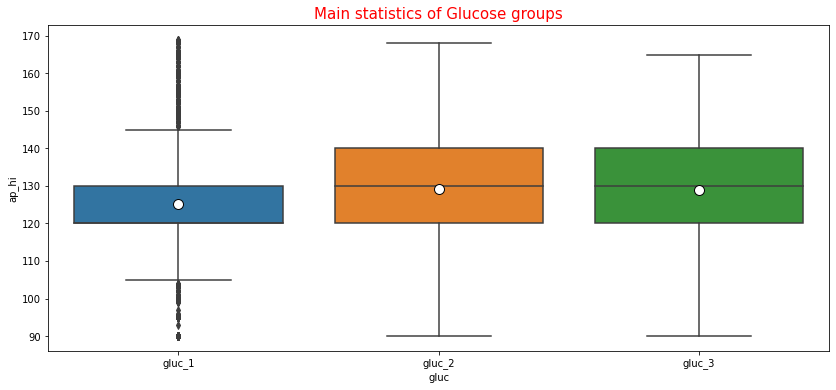

In [74]:
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.boxplot(y = df.ap_hi, x = df.gluc, showmeans=True, 
                 meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})

ax.set_xticklabels(["gluc_1", "gluc_2", "gluc_3"])

plt.title("Main statistics of Glucose groups", fontdict = {"fontsize":15, "color": "red"})

plt.show()

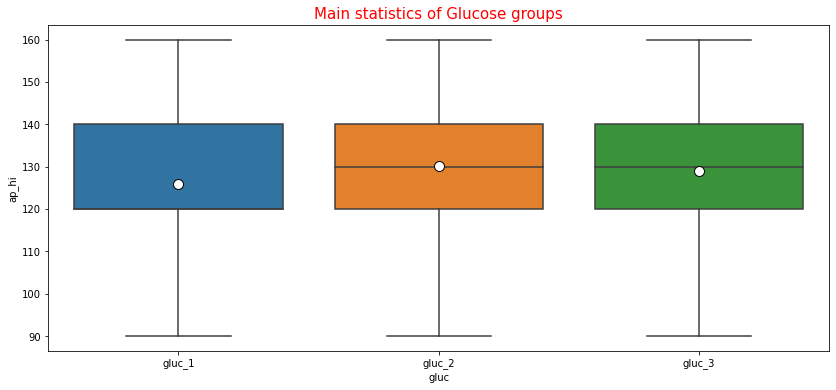

In [115]:
# boxplots for a 500 sample df2
fig, ax = plt.subplots(figsize=(14, 6))

ax = sns.boxplot(y = df2.ap_hi, x = df2.gluc, showmeans=True, 
                 meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})

ax.set_xticklabels(["gluc_1", "gluc_2", "gluc_3"])

plt.title("Main statistics of Glucose groups", fontdict = {"fontsize":15, "color": "red"})

plt.show()

⭐Show the descriptive statistics of 3 groups.

In [100]:
df.groupby("gluc").ap_hi.describe().T

gluc,1,2,3
count,57823.000000,4908.000000,5117.000000
mean,125.127804,129.242869,129.004104
std,14.608797,16.646412,14.173316
min,90.000000,90.000000,90.000000
25%,120.000000,120.000000,120.000000
50%,120.000000,130.000000,130.000000
75%,130.000000,140.000000,140.000000
max,169.000000,168.000000,165.000000


In [117]:
# descriptive statistics for a 500 sample df2
df2.groupby("gluc").ap_hi.describe().T

gluc,1,2,3
count,435.000000,29.000000,36.000000
mean,125.990805,130.172414,128.888889
std,14.416130,19.294835,17.200960
min,90.000000,90.000000,90.000000
25%,120.000000,120.000000,120.000000
50%,120.000000,130.000000,130.000000
75%,140.000000,140.000000,140.000000
max,160.000000,160.000000,160.000000


⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [ ]:
# H0: μ1 = μ2 = μ3
# Ha: At least one μi is different

In [108]:
df.groupby("gluc").ap_hi.describe().T.loc["mean", :]

gluc
1    125.127804
2    129.242869
3    129.004104
Name: mean, dtype: float64

In [112]:
df2 = df.sample(500)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 51029 to 39930
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          500 non-null    int64  
 2   gender       500 non-null    int64  
 3   height       500 non-null    int64  
 4   weight       500 non-null    float64
 5   ap_hi        500 non-null    float64
 6   ap_lo        500 non-null    int64  
 7   cholesterol  500 non-null    int64  
 8   gluc         500 non-null    int64  
 9   smoke        500 non-null    int64  
 10  alco         500 non-null    int64  
 11  active       500 non-null    int64  
 12  cardio       500 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 54.7 KB


In [113]:
anova_test = f_oneway((df2.ap_hi[df.gluc==1]), (df.ap_hi[df.gluc==2]), (df.ap_hi[df.gluc==3]))
anova_test

F_onewayResult(statistic=8.921631604246343, pvalue=0.00013448894502109335)

In [114]:
# Decision
alpha = 0.05

if anova_test.pvalue < alpha:
    print("We can reject H0 at 0.05 significance level and conclude that the differences among group means are statistically significant")
else:
    print("Fail to reject")

We can reject H0 at 0.05 significance level and conclude that the differences among group means are statistically significant


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

⭐Create a crosstab using Pandas.

In [111]:
pd.crosstab(index = df["active"], columns = df["cardio"])

cardio,0,1
active,,
0,6278,7010
1,28318,26242


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [109]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')